In [4]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from urllib.request import urlopen

In [15]:
url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAABjFBMVEUAAADlc3P/4IPGKCf////lOTX/wQf/sgD/lwAhISHodHT/44XbwXD/yAf/ygfGY2TNKSjc3NztOze2HBxhSQOlpaWrIiJLDw/bggCUS0vweHilfQVXLCylYgD/nADwPDf/6omlkVX/0wxXFhSAGhncpgaUJSJhYWFhVTLFMS5hOQC+HR1UVFRUSisMDAydnZ3WKyr/ugDWa2u7jQWcGBhUQAPu7u67u7s4HBzYpAZIJCT/3Q2rVVbutAeOfUmAQEG7pGCfjFLu0Xr/8o0/NyClcwCOjo7/rQX70H/ri3b1un1vFxeNIyGliQjctgqMagXjaHJ+AAA4Dg08AACekJCnKifcmQAhEBExCgo/Pz+OVQC7bgA/MAFUMgFrUQMlGwSlhj+JOBaUb2+7mgn/1l3tW1b/0T9aSwRQOAB1V1c/JQCBWATFkgZZMQKeVgpOABXupgClkms8AA+eNDNaIyHWR0H/5XPtyEv2NymOdA3kYF6YPh5yABNDCCH/kgCEXUJ0Qw6dcVCBcVTRl2oz9OAEAAAd1ElEQVR4nO2d+0MT157ApyLBBhImARIkkEBeEA0S0EBBEV9gK6gIRduq2N5W8d7e3nrtbmu7Xbe7+4/v+Z73c2byArzb7w8aMpPJ+eR7zvd1zpzxvD/l/6OsDZ+UrB0T4eRE/GRkYrLdJs/NmHI9iPCjk5Egwp2Dn86r8ol0dGZ6UJfpoQ+M0H/3MkDhM4NndBkcmp/T5ejw1BCWSv82qcjav6d/c51sJzwzOK3Lz8mrp4aw8e7lhCoBJzsITfk58SqAEL4l7miYow0dEPa/exl68lobhEU34QQcOG9FnCCfWuscUVZL9V067OyJ860SviqabeW9BBMqqlIOwe/SMaKsloNCf9jp8ZYJiQ43hpeEqibW2FCHQ5/AkJ+wHvK8J5MdazG+NLzRU0Kiw/NsuGGT7BmCwwF01HpI/n4uLSCKjnfg6qWSv2iN8OfvfsndlwdbfBjcKr9GLjc19Qc+jmQ4vqQcyuU2p76CQ0uiIcPMMw+3gsivun1w8NJmbeLXhM8Xw1b2+C7C716tkpMpofwLgSQT+fwU++P8xLByKJEYyI/DS0Rj/MDnNRscpFSp43mld+8s2rNHBdeHhLgQv0s8kAnZkDgcJdJMxPLnnj6/cOECvLsxfA3+a7JDsdjdc5RwiUXRfERtDCtaRGcsfeQShbDhT/wmfXIpWnQ+Px1Nh8ysFRNUYogwDyJdrJKkhwShpnkiiglCV7Z7HZ0Qybt3v7kORSJUIprviooOWWdIxqgkk/lzIAohOxhLUMIlKyF3JHFwLpPgdXpFOHObA3L/rotEeFgUgJ43fo4g5vmA5IT593DgrnKdXJJKDv7CSHE+el2OJQJhPwnoXIR8FA7+XAwnHE3ETEJgoYSrnNBQLyKkH05QQmgWJ3SFBxphwULo44AulPC7V7+wTEKVa9QMBBKeOzf+1PPWOaBK2KxgWY8phPENCBfg5eXKQ3d4sERsGJVSSUopqKWJY+sTTphctZ+BzR6y5yGE4Bt4D04kVEJ+QCYUVr5C+63d3MSHlfb4Ugguxw8RdBhAiLx5PITwnESYyOUo4dTU37zD3GUFcGBgE65LUvJnEBysJx7r4UEAYcGeZMTVHN9CmHATwndMtEAoG6ELyMAogDEpTkAXTGLncpeHBy3pUD3P5vrn52+E6HByDVw2GglL2LG2SngOCBMq4ePxr8i1ITx4SA7y8MBKuCY3PeO//M3enW2EQ9PclDp0iJJc2Zp1gTDRZBerJGlwEEwIPlNpU/WdPcmwEoqIjft3jVBJKzsmTCZjyVF2MWF5Yzw8cGhHaZOZZMRJWhpE+IpYM03AR+Fg7ZC5yg4JUTfJn7uAL4gcf0wmpOGBI3zTWp9VQ/CA4EYQvrIT0ks3E8kQwrzkLSA2shNWEGH+Ar6g0nGTA8y16GmHvQeWCjLhhDUwjKrDtckn3sNKJZYYR/KVO6Z5+vz7Cu11lWZznB+xEsIFZcCHzae4F4w/9z6Z3LCXftyEKHKwugldh/fthPAfbiL2bkFR22hSwhCq/UEiTFDCXFJV4ag3lac/h6tyqRHKvTSgajxz89aZgF46STL6hzmsm/ehhAmTEHn8zRw3KKso758CQi0GiEKIEnkJZO+g+vJlPJzwtoi6XyVNHdK0vYJbnmiPkH0cXyLn/ZDPEwwljotCaFQYRJIRQCjypp9/Wf1VO7g2eR4c/WETD5nV1fBe6iCMSYTPYTR/D44eBeKrLREiLU7KyXy//xt1/AHjkBEOJopHxkGamxdxu7GV7wIhFuTokxV4sdoSIdKiI3xz21JB+MpJmJQa3RlhgpnrVfKTYdRWCN0huNMfcsJXBuEEdfTJWLcIcbDGHf0i1AWYmY1KqIVvEQhvT0/juNSiQy2T6AbhqHTBBHY+z6nbiEz40e6u1MbGu1DCubk5nFvohGsobe4p4eXm93DG+PhUE3KLyISfffrp0NA8a2apdJCmjGodQBVcGk4WlfrF5ISe0YcRQsrXNAnzgjCRFITI5FzIS7+LIHxOv92hwc9QY6fnRUMhBCdFYc0IKXqEGfzc/WcS3/lrcb0qE0KYf4ocO3fignBqCuXvBJBMAYQRPkXnfHLeEX1/du8edLgbM3OsqdtiJn/DwuYSEvu6CJMKIdPVcymRT3BCiMUT0slTYYTnaPpv7ae790gyOzg90wKNLlD8umapHZJgWg6vwTgePWW1Cim8Xq/8/YfngjDWEuE5N+Fnn92jIdjgDVhw0CahmLjWqjIkIcqrBbVkU1gIqRYKoVnXCXc/FeUIWHBwu11CfkXVH/JRJxMqNlAivMAsaUTCZLEZSri7+6k6gTTdDp5adZ6QY5peEuJDIhmxEu7entZnyKZvt95RtZpzvIuEuJMzjwLhGx6pxMdYZgd0wt1dy/yY7DYiyLXhYXmyvsuE2FB99cMmTu1RRj+FawB58k44IXL0tuU/MPd5IzLhsDm73jGhMEsstTeiUHgnlBAcvQmIEJEErFQjssEcpqWc3inhOPj7ROeExNE75NbNkGWHwxPuxREdEuLwgGZHnRAyR+8Qx7JDtu5lLWhRRHRClLY3Wcym+7oYiwHaJBSOPlDEssN5qjoqQas+IhNCeC3CAINQlGfaIJQdfTAim5sfonYlgKwtwlggIbzTFqHh6CMo84MitDj6Eyfk3pwTsncMQloalqcANEKroz9hQu7NRVTN/btGmH9+4YX3bHR09NBFaHf0PSXMhxMqmV5Tq1Dk8HKiJLyjrjOyErocfa8IcZI+no9KyLN+mfAwh+WZ98cUkiqWsosw0NH3gjBGfvvIhKyOllSqTLIU0iA1TJg3CEMcfS8ISesthOPjzaZJiKfQQJreV+NYvikpkk33gyDC7NuncFwhjOjoj4VwnFX+dUJdakRpXPoZYaPxFh3mFhgIIzv6LhCKLN9NmMSdGKR4SKxIPv/aJOy3CSL0/T10+ALOgjlhm4AtEX4Un1iCk1ejECb06cdaQRcrICbs85FkSIUuTxbWOBe9dpWQzoRU7ITM7uNemjAmye0acxCCACHuqKeFsALLfV54f7vwHK8aPvqPmioRAQVhXyZz4fn4yRFKGiOrgCuazqrpqEwuwj6fBxUnQLjOPPVXZB1+LrdZVSWy0gIIy+V/kKDiuAkTMUNjnvej1fa3LGmJEBmct6SbHBchnbK6jNz2338saVJul0kRv5bJ7nHCPn/77T9gJe4xEcrTjrrG2leaIukdL9sQgKDFMvnCYyfMdgXIJKx6WRkQxiL5wlvHF9MQb90bQAthH3b9IDePKy7tFZyLELt+kJne5xbE0pSy7fqBdgmR689kst6dueu9zg+Ztzh2QuirWfTFc73O8U+SsK9aLnl3ZtoYix8MITWqva21/Un4L0TYTYehJsInTshWyu10DRHF2TLiyRPSGx3azf36legVxbKFmhpCuAn9D4OwlpXi2XQZSohqCOH2h9vZL7x59y3Kp4QwXSNlX/JHocTC+Bq/3Il7/M4Ia1CxZ+l/eqe6dwmL55V5QSCMsHXA4yREracCHy943sdE5AueCkK4Z6aslc5qNZ+99F11tVqtzHWGTum7dIkS0ndODSG970nJgNNZ7j9Qku6pDkCcQ5EuEUV+LOQSv+CpICSLFEsKYcmrEpufLlRZlqx25AKyKx82IWkiURQhUKKCgkKkCh6H9Ac5pYTE7pdQI9MlQViVtRhKGGJp/AYQOrez6DFhOlt6gjrak1I2nZa64p5SX6z1ZcHKtEno72WfwN4kvc/xJUKhIayfS2T4KYNN6clYz2GEMIythHDOcdRpiODb4vaqfJyRHgg2v4qc+McOwvQBzNGbWpQ9Pjpnp1y1dVJM2PtaG0cki4ULCiHRhWIeFcJ+Okdv0yBLx5ChKtvtzDETsrIiG2FUMco408chPTdbsunwgAYMaBifQkKLWlQHoEjaYlSFa/nQCG2xa8FBSH6OU0voaLSF0HqyiGlOHWE6mNDSSwMIacBgJfQb8LljmLfQCGluDnmC6c0dlobzaR/gAYONMJNFAc2NoVttAXZCyMuKaYs3Z2pR7UxNSQq101GncBDCwWOa5WaEw+TeN+qnUbbuGa4ceQEpKiAa5B6fhQfsU/Tk00PIbqImhAXPGo9dkqMC8kso+VNBaD5kHJ4EoVz8Bo9vDalBUXK6nz4oZZVRh2tt8qA9nYRWfygNNhmxUPOo4CFK66Wh/vDDIaTewvOkIgh9JzCmUQnxHQbHSSiHKdKApKUKfXkenFxTShzkHRp5RyDEN6i1kgrbCONht5aoUzSBhLpHLBhTV9I7dkJfJiQ3Gc7djo5oIYSdtIJvDwIZXkJ9LXuQ7if5+8csS1BKhpayovmeeMdKWAV/f2uIaXDuBWrui7noWjQJqScYDtOiVBou8PJMraCUfVsUGyGdkCEaHBQ3+96OankMQubNN8J2vpUIoTyDnfiOn65B2V4u1HeHEDf21k18W/rh/V+VzYJaIwzY+TaQkIw6bPLTkATWWtdgKCG7e/L+1Qd8ZAZvC2whZBvnlkpP9J1vgwjLpT3sxFlLs1m96g/i60RtETaPvr36ADblRLH44BmyLXCQOjVCtnFufz+oJXDzbXmKBmpkcpytLeNTnF6nhA+uFovFq3h7/5vsNsqgxEonpDssNXAFFt+t7tyVHxMyT7bjXsuXLvRR2xM2/x+RECPCy5nbt8iVZwK8h42w1N/w/UY/tooTTKsWRHmKJu1sPQu4xeREu4RnBsnGCfevUkJJ3N7D1ksxod/YIYRUq5YYwJzAsDa7qiYQAWcWTEJt+n7aReie0rBZGmQzGoxwcvIJuYQlBmiNkKUU7hOzpYPMiAaoTd9zwuKDB7AJU/PBA/IiMiHzFkBY1n6mLhB61qlFKgXYiVTvo9r0vSAsXoVdkI6u0hfuKX7T4zNCP7OzDS+3d3bIi+Mg7LMTnrEQFr+9f4gJ8Qv3or4AQr+BrXyt0SAvHITuJveYsHj1PiGEF55zqU0wYbYEPYe+uKbvdY+3tsuG3A2Dp+8dWX+HhMVvj3598KATQr/R6MeE5IW5WeqEOkVj1WBWKeHgTtE1wiKEb1c7IfShFFsjvsNGqE7R2AlLJqHDZYQTcn/IEWVCx43sIYTI8We9cqNrhPI8TMuELKa57zWFFvGrxOIbOGSt5eiEtOP1C0SZUPf6vSZUp+8F4ZHQIpbYwGNMaNOi7vGp8UDJAWVs1DI1+A9Wyxsb3rZCeIkl/weOJMMk1KbvKWEx+eDbo6aEGFscGBh4/EbZjNxFSLYOzDIDQxDJf6TDTNr2VQoKxYyFQu7U0UIIp4vpe0bIDAwTABwYWFRPthPijehLO9VGQyL0gwhxQQCl9m7Cg2qJaa+E79pznuwiHDyjExaT97E9Jbd2JgaIbG4+8+ZmDC0qhGT9b6Pha4Ri0OtbGCrlfTuiVLkpBN4BZkZtTkJqYGJ3B2RZHPUsSYaNEMwLH4cMkATBa3reH762PX2QpffbH7jg6H20e/sHcHdMOCF7sklswCQ0QnA7IXLxEhv7PpLI6P00jLA/9P69dJbo+OLFfbACfhihprr2CBXt8S9sj9Ah0m3rJUa4h+2c6DZWwqsJO+DAItzybxSLrYS63+0FYcETcuUilpER+PcKvJOxEbKYZtNBOLAYw08CmQ4j7G8EE6pPTmvtDgzRYxXCEUkIIYsZtSrTdCAhfdZJAGEcnnb1RXbbpcSRTNVM9qXyfqjUsuK+4StCRhSBd7azWIzp+04Jmcd3EdJJEpUwHmHlN1Mcn12DUTfilotZdpYWahLCxWBCteBvq7W5CfsshBHWtvs79B79nTKX7QBAN+HgzZk73uHmZRfh482HesH/OAiF6vYvjlxk0hYhMjYwu9Z0anHxsf4pa+SdMbIYTghjQ0v2HYS+2BIjs0+GVXb74sgVWTLGAKSyR/jm5o2ECBOOuvtpGCHLntwj0UwU7YRk0T5THVfcRU+WsqI4zxBLUtsxIU0X3P3UdxCytfpcqqKhe6Jz+grB7xclUQ9hcW3DOhpzImJC+eb9LhBK5f10VrSuLDVe0s/dvCTSg6xMcUxlT9/Gk4jukRiDwzcHQwidcQ0lVFMMtvJbulnL82RjeVEQ8k28+A5JAYREdGMTTEgTRTchuek+m3UbGzPZx4RPwI1XrVbkyt7bcSbnZHlTuWynW0lteS/Ys8C12/A7JqSBmJPQkgqLp55csfqBK6rquLy/a9kFBkvq7JikzGnlEbCDN+HNWAihVhnokFA81GYbnHkEwvxdLItsJx8qW2NEFpbPpsa22Lt36L65NH8fHIIddDc337gQ1WTfTegeiWayrzzUZt9QooVQbOiWSIinkqXOSpIyNDs/Le+g+9itRTnZd6ynQeZfn+gShJZkP36N7NMLU3F7WjCduVJm+5JxuRuTJPEQP1H30CScxVLnhOxxvjciEM65CdkN2/Yl1332ZF9/kpuEiE8GwrvaQwFjkh4TeNtSndClTK9DQurEnYTWVBhkd/c/2ddnhDMkhO/fv7/rAKSSbJHwjdslysl+Nwl3iQO7ZWtOMpgugHDB22d1lYx20UjJfmAvDSlnaJVFugWufVf0cEJXLx0TuY5BuOhUYyAhewZmi8k+2wLXQtisrIYCVpqvUwqghRBvxQNCY95now9diEGE0oOwWkn22Ra4xmbonvFsXKsGK2zUBRHSLxfd1ZlkiGTfuXIvmNBIhdkWuMQdS/IQefTLoYCrua/HFqISZsrfkG3+Dt2EItkPWLnXCqH7oTYV/uzUIA3mvPpZXVyEyAockR2WcwGJIk/2betpXpDH3T+LnuyzLXAHh4auex8TP/0lvk6zEoqHxmDl6/qWxrecWqnXbYSZzDdHD/lzsB47vaKDEK+JGmW/kBcx2edb4OL0dJY0cYw9uzhcg01vzNDgAtOqRohiRvHAS3jinrOfOgjFA4ESwYRSKsz3uieLsOusia+LEbwgambxtaePQQCbdRIqjzENJETJvpswlkiuRyLke91PwzuSNlJtOfpuEbJkf9pNiD8fnuwTR8+fuKQSFkP7qeHoOWGEXgpPTXSXbGiiGEIYmuz/F3b04qlZ8ohKpV4jWxPoK0xHj2WrPsbeDrA0gFh5/dplbKIRhqbCeMmc5CRUmwHvkM3zDWUm2N68FgWenRXXcXgLqZM/dmgxAiFKwCMQnuFPryMJ+orU0gX09z9zVJTQLUHeMx09/tSXAYTE4yfEdTY37VoMIJS2zg9N9uekJxAq40caUVSUR6rTh16bjp5qPoAQx4zK9v72JMNKiKv6TeVxeMaqVpUQ593zKEzPEsKV+pY2sFbqJASY/boiCbLT8L7u6M/C6N3PPmGEqdTn+2YCkMm+VR6taxK+efyYrbCxV/WlX+jImSj6cv23kZESVptizsrlMyw2E4o/DuvoKWHde2RL4iDeWA0i3CRfMWT4Q0aobJ5vv7/aJ0uyGKEfTrgQldD3OeGs++5uTtj0NhWXsbhIM2Bn1HZYLCq/kPOOOS4Z+J3hW2mjXa2njeb6Ma0Mzuj7wggzsg7wg2teC8RF3iwciqiEpJSEn15HH9hEeqm+7EQvKPCFBVEIOVjdEo4Su+IH91LF0mB7SpKMRSwx3iwzA8b7eOFH1a9WHmJPjS1NWU32/W0yxU4kKy3yyYz8tY59RSq1VV8xWk+aXF9JLZOXqdQY1Aqlg1uzG/higtBmaar7f1Q0z4MJF0lVEldfr4MBHDQJ4SWx6ckm9tTYW5S5vSYFIWn4eUZIxX97Uz+merHtUdRLNCauY/f4o2q8iwhhVnhxVDQLP/PXrLVJhLHLxCMrhBkyBf+FhyvtcHJJ3TBHtGxFc/1ElhfGROkeyV8ebZM4AVMv4HeqUQi1+GgV3D4U8wndzMzNIfvMjEwYYw+oEIS+dAfGHImzNTOgtsyativyiI3nMaZefRxGI1T3+b+t3LDnJkQZNK60VzPbZLBlMtvkCvN4xmvaRri9/znz96brR2k7hPKSVIEQggEUZ6dS9TonlK4THHkzqTTxQ6jvwLPywtZE5eRJk6JnkSE8a2kjRAP1kVCd7hixP5RWzcGQy7BYz1OqMtJ1ArMnSYtFMvyMW9klQloIlj+ftBMO8iVmj/T8EXWhWRchxtCjaFbYVgml66iEfuOtGt+KtmLCoFXQZFJtvZgTTwxfBcdKBKOen5iY2JXc6DL6+j1jkMxKUHDWAnsxdnbZRSj9CoGEPjhqe04dSkgLwatgeek1oM6TlD9/Pq6W7lNWM6ATjgnUVBuEJMqRCK18jNC9znvi2iQK2NZX8SM0m1iLl5sPhWOlhGrpPgphNbMBbh0syXJbhMg+7fOOEkCIopSmbe99TihSCrC8SVxNlKrxhFAr3QPhvhpUGYQZ4mP4yGyZUP4UhL7uAmwycI2wnDSts6RcqrBgwv9WSvdktv3zR6o9zZQ3pLQdCDPl7S4RjpR/z+XWnYSJyIQ4tfekB9zrvZyshnA02pcbjYNyJbHqhBAC7oDSXQuEKOAefaEY5dV1+Y4UsqIlSqNJ2iEI67Mjmc4I3YAtEeLih0S4Shw9X6LSLiF/58QIpdQecgsu68zRY6Ery46TkPiLSITOtfrac/Fi5qPhlD1wLIauLUK5MiATorhtxHadUELPvc6bPo9LfhazRsimJ+Y0Qi1ya41QqgwohI7rFN2Whq88UlelqoTrNLXHsk5qfisp7K2FpVEJcfHP2fG6S4jyiiPnhCS2jluQvqgri9WoLYlTe+lTRan0QqM+stJazv0ChlYXCX16smNSmXi4MZKCDtlW0OLp+yRO7YUWczlw6zQ3J4R4tfyskr+7CNGnHpVHukK4MLZRxgWc8u+b1oUB0FRcK8BNvT5j5vjcW0jBmpg2obk5EE6Tn0oWtfKv+HduAzsk5GVF3//RsyzuUGZ4oIXmGmHhDyHgpnKZFMJgSn02gLA++5Oo/I9kfmLlM+HHsvs83W+BUPqUUoaDBTpkZoDgSU2Fb11Wb5e1ePwkr3nw/KUuxqGFUK7buiNmPp6jEtodiVzpo4/1bmq23T4O5ZhmlV2B1xFmOyRUisWRCbVDZIGbPJVAYpLia9nyLcuu2xm1kef4StWuU0HIzQEv+FNRfgUvmFBMu8srQMZ4L2WT9fp8AyfUK1E2whE/gFDP6AMI6xbCMTdhHC/RPxTT7nwVD51ST6XquFY3BzHAsoNQrgI6CFOpv+5X3YRKRi+mCdgVoebofUlmHVOpLa8OdqXOzoGmrjgJadRGp91JXFonP1VArzjLfs5HhDArd2AroTGdZFGU1E+zlhEhLUqaVSaM69zj2+8KWjqPeyp+Zn0Cuf5/gltfYCX3QMIVSzW+l4RfkjKCSkiaGkRI75XEAuEbr7RLl3YQmrNivSX0WHFVJiTXCSSE2bXJyU/g7/XK/0DnJpV2KluzX8Kh2fpxEioD+ywxB5wQJg6wd9hikwK4jKDeW6vPkE6w1Zf099AwPPccfU8IVeN8lmjME82Qp3qUc0Lv7GqHENzxvuxIukFoKzFHIQy67wkn+3Dign1ljI3P5pqcnq01QiPZ55sJcger+64wQuw2CI9OuOAitBkhZ3TSIqGemvBFQM41A+SckDu76Jye9lE8ARhAuCx/oHuEyPHDxMAKb/3gmaFb3NGbhCQ4YeV9551dZvBJvz6AUHmvi4RkpSef4UGEZH5W92dKe9x3BX127x6ZozcJU3DjnMkHC+10QhYDRCAsP/p8TGqklbBcLj/6CyTxbIx1QAir7gf1tbBcLbPGe2cN+4aFxXHhhMiU7Dt8jHwOuA0qUQktazE+Yqvu8abS+jR8IOGduXllHOqK2tvn8TrL1sVBlxdVpcqW8cwoLZQW6HCB4GTetp5GrLpX1qRHIZy5Lds3i6JkV2lOzUch7GO7nWBPILXQtnoMd2fLXUF81b1eFCViekhBOB1MGLSAJCphX5+8Y40ovbdAuCuqxVZCh9h81IixQVG3CdXpk2iEdI7+jPoLRSO8qRHa9gfsMqEyjakLDk70tYlsjp5aIHx/j7VXKsJieeGFzUnCHhGeuQU3BNtznWVe3heEbI6eIU4H9AGZEM4i26NTC25vYi8I+YKJoIZxQnZ7nUBslZD4qFljZv+0EN7jGxdQaU2H+BPEIWet99l0k1A0NZyQrfO+Nvy/Q7rgOyWXUyGCa1s3yO72lDBjlSzJxEG2tHOkQ/iC9gtggS+4Ltp4A/5eCW7YDe9P+ReQ/wM29OqcXswTJAAAAABJRU5ErkJggg=="
resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)
print(img.shape)

(225, 225, 3)


In [6]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


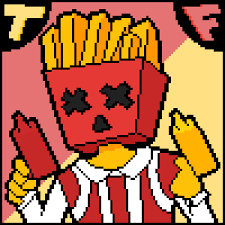

In [16]:
cv2_imshow(img)

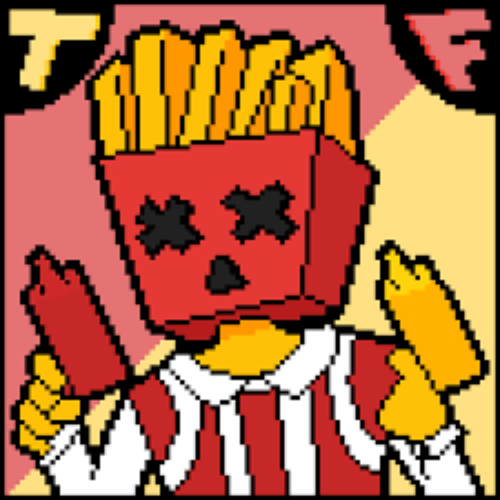

In [17]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_LINEAR_EXACT)
cv2_imshow(resize_img_interpolation)

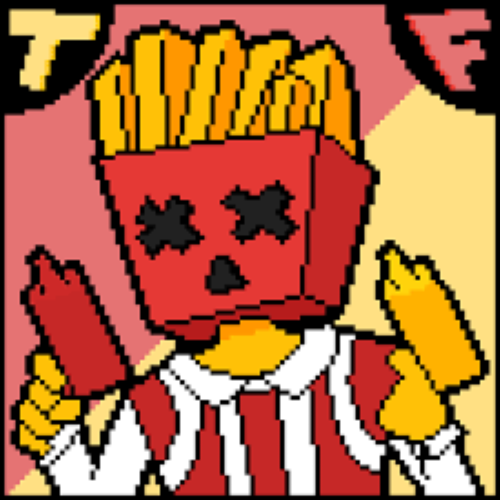

In [18]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_LINEAR)
cv2_imshow(resize_img_interpolation)

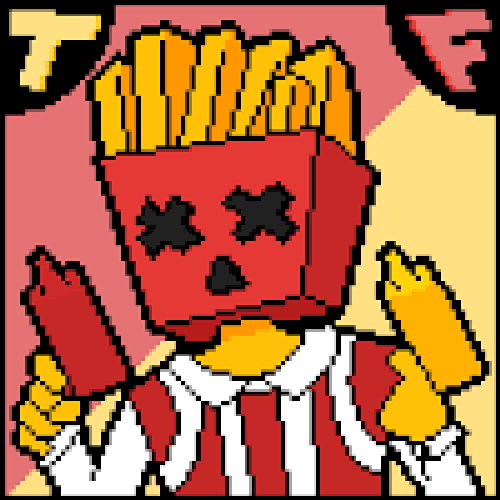

In [19]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_NEAREST)
cv2_imshow(resize_img_interpolation)

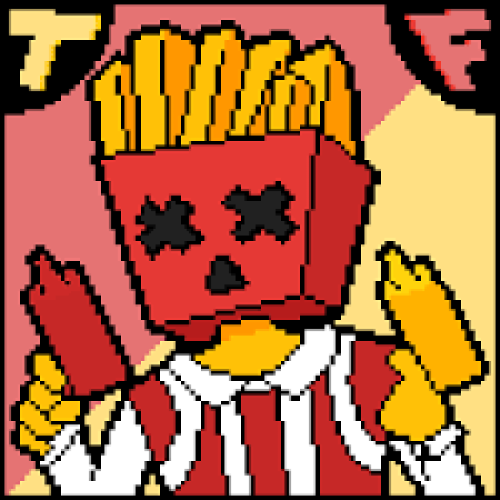

In [20]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_AREA)
cv2_imshow(resize_img_interpolation)

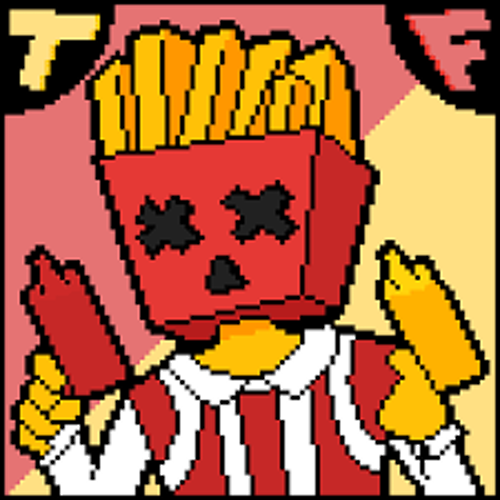

In [21]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_img_interpolation)

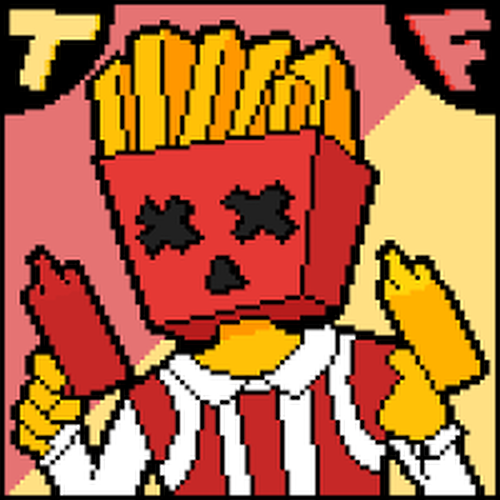

In [22]:
resize_img_interpolation = cv2.resize(img,(500,500),interpolation=cv2.INTER_LANCZOS4)
cv2_imshow(resize_img_interpolation)

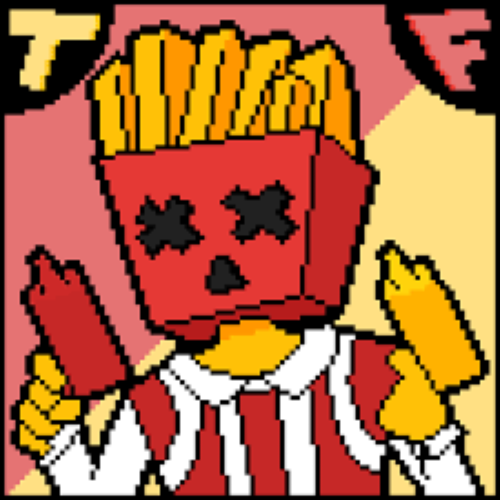

In [23]:
resize_img_interpolation = cv2.resize(img,(500,500))
cv2_imshow(resize_img_interpolation)